# Library Usage

For this assignment, you will be taking Library Usage data from San Francisco and creating charts to determine which patron type checks out items from the library the most.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Reduce the data to include only patrons who have checked out at least one item
* Split up your data into groups based upon the 'Patron Type Definition' column
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem
import scipy.stats as st


In [2]:
# Import our data into pandas from CSV
file_path = '../Resources/library_usage.csv'
library_usage_df = pd.read_csv(file_path, low_memory=False)

library_usage_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,NaN,NaN,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,NaN,NaN,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,NaN,NaN,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0


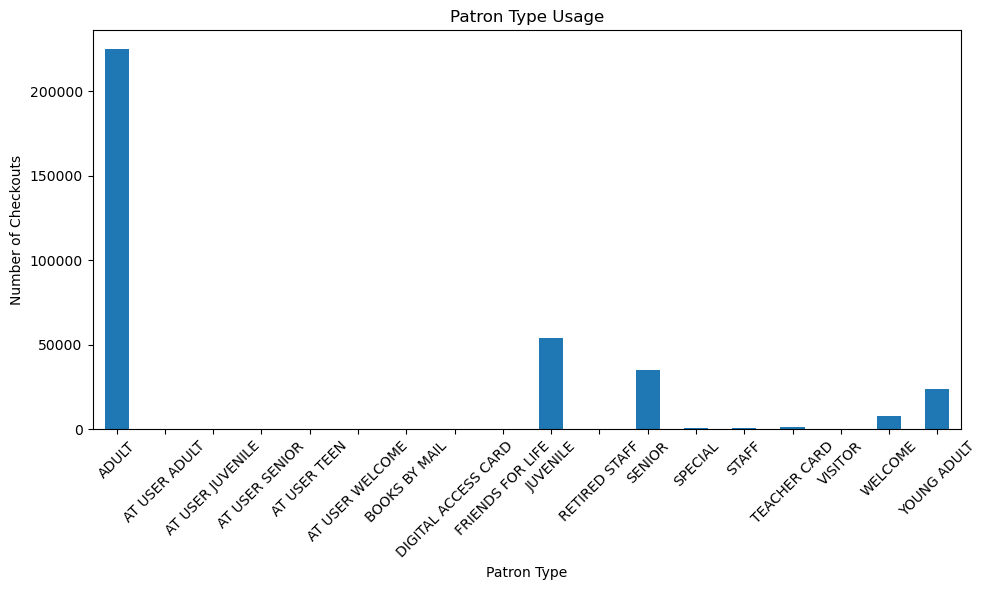

In [14]:
# Filter data to include only patrons who checked out at least one item
library_usage_df = library_usage_df[library_usage_df['Total Checkouts'] > 0]

# Group data by 'Patron Type Definition' and count the number of checkouts for each type
patron_type_groups = library_usage_df.groupby('Patron Type Definition')
patron_type_counts = patron_type_groups['Total Checkouts'].count()

# Create a bar chart for the patron type usage
plt.figure(figsize=(10, 6))
patron_chart = patron_type_counts.plot(kind="bar", title="Patron Type Usage")
patron_chart.set_xlabel("Patron Type")
patron_chart.set_ylabel("Number of Checkouts")
patron_chart.set_xticklabels(patron_type_counts.index, rotation=45)
plt.tight_layout()
plt.show()


## Individual Branch Charts
You will now take the same base data frame before and create some code that will allow you to create individual bar charts for each library branch. For this part of the activity, we want you to chart the total 'Total Checkouts' of each library, sorted by patron type. If you are able to, try and come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

Since there are quite a lot of patron types with minimal checkouts, the pie charts could look messy with overlapping text. You may also like to include a filter to limit the minimum number of total checkouts by patron group.

In [9]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'
home_library_groups = library_usage_df.groupby(['Home Library Definition', 'Patron Type Definition'])



# Create a new variable that holds the sum of our groups
home_library_sums = home_library_groups.sum()
home_library_sums.head()

# #print the values for column "Home Library Definition"
# home_library_sums.index.get_level_values('Home Library Definition')


Patron Type Code  \
Home Library Definition Patron Type Definition                     
Anza                    ADULT                                  0   
                        AT USER ADULT                        300   
                        AT USER JUVENILE                     101   
                        AT USER TEEN                         102   
                        DIGITAL ACCESS CARD                   32   

                                                Total Checkouts  \
Home Library Definition Patron Type Definition                    
Anza                    ADULT                            855994   
                        AT USER ADULT                       131   
                        AT USER JUVENILE                     77   
                        AT USER TEEN                         45   
                        DIGITAL ACCESS CARD                   4   

                                                Total Renewals  \
Home Library Definition Patron Type Definition                   
Anza                    ADULT                           404814   
                        AT USER ADULT                       39   
                        AT USER JUVENILE                     1   
                        AT USER TEEN                         5   
                        DIGITAL ACCESS CARD                  0   

                                                                                        Age Range  \
Home Library Definition Patron Type Definition                                                      
Anza                    ADULT                   60 to 64 years35 to 44 years25 to 34 years45 t...   
                        AT USER ADULT                  25 to 34 years25 to 34 years45 to 54 years   
                        AT USER JUVENILE                                           10 to 19 years   
                        AT USER TEEN                                               20 to 24 years   
                        DIGITAL ACCESS CARD                          25 to 34 years25 to 34 years   

                                                                                Home Library Code  \
Home Library Definition Patron Type Definition                                                      
Anza                    ADULT                   A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5A5...   
                        AT USER ADULT                                                      A5A5A5   
                        AT USER JUVENILE                                                       A5   
                        AT USER TEEN                                                           A5   
                        DIGITAL ACCESS CARD                                                  A5A5   

                                                                         Circulation Active Month  \
Home Library Definition Patron Type Definition                                                      
Anza                    ADULT                   JuneJulyJanuaryFebruaryAugustJuneJulyAprilJanu...   
                        AT USER ADULT                                           JanuaryAugustJune   
                        AT USER JUVENILE                                                  October   
                        AT USER TEEN                                                          May   
                        DIGITAL ACCESS CARD                                      NovemberNovember   

                                                Circulation Active Year  \
Home Library Definition Patron Type Definition                            
Anza                    ADULT                                 7669836.0   
                        AT USER ADULT                            6041.0   
                        AT USER JUVENILE                         2012.0   
                        AT USER TEEN                             2010.0   
                        DIGITAL ACCESS CARD                     

<Axes: title={'center': 'Western Addition Library Usage (Adjusted)'}, xlabel='Patron Type Definition', ylabel='Total Checkouts'>

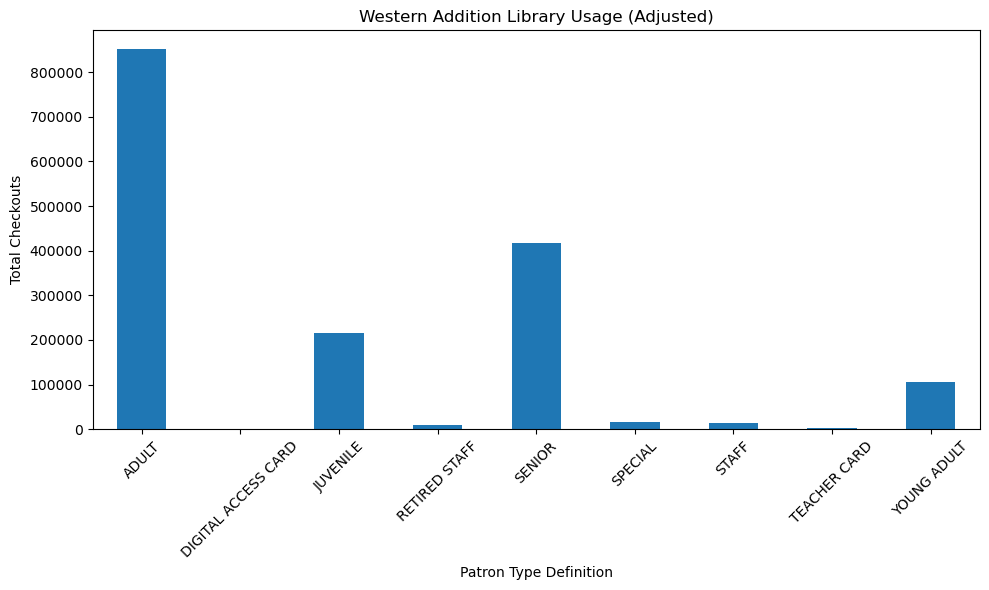

In [15]:
# Make a variable called branch and store a 'Home Library Definition' in it
western_branch = "Western Addition"
anza_branch = "Anza"

# Make a variable called min_checkouts that you can change depending on how busy the library branch you've chosen is
min_checkouts = 1000000

# Collect the loans of the branch above
western_branch_data = home_library_sums.loc[western_branch, :]

# Filter the data to patron types with greater than the value set for min_checkouts
western_branch_data = western_branch_data.loc[western_branch_data['Total Checkouts'] > min_checkouts, :]

# Adjusting the minimum checkouts threshold to a lower value for Western Branch
min_checkouts_adjusted = 1000  # New threshold

# Re-collecting and re-filtering the loans for the Western Branch with the new threshold
western_branch_data_adjusted = home_library_sums.loc[western_branch, :]
western_branch_data_adjusted = western_branch_data_adjusted[western_branch_data_adjusted['Total Checkouts'] > min_checkouts_adjusted]

# Check if the adjusted western_branch_data DataFrame is empty and create a bar chart if not
if western_branch_data_adjusted.empty:
    western_branch_chart_adjusted = "No data available for the specified branch and patron types with the adjusted threshold."
else:
    plt.figure(figsize=(10, 6))
    western_branch_chart_adjusted = western_branch_data_adjusted['Total Checkouts'].plot(kind="bar", title="Western Addition Library Usage (Adjusted)")
    western_branch_chart_adjusted.set_xlabel("Patron Type Definition")
    western_branch_chart_adjusted.set_ylabel("Total Checkouts")
    western_branch_chart_adjusted.set_xticklabels(western_branch_data_adjusted.index, rotation=45)
    plt.tight_layout()

western_branch_chart_adjusted

